<a href="https://colab.research.google.com/github/Braither/Course_ComputationalTools/blob/main/HC_Tarea2_NumericalErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuación cuadrática**:

A continuación se define la función para resolver la ecuación cuadrática de las dos formas diferentes planteadas en el problema, además del cálculo respectivo de la diferencia relativa entre ellas y sus gráficas. Se escoge a $x_1$ como la raíz con signo positivo.

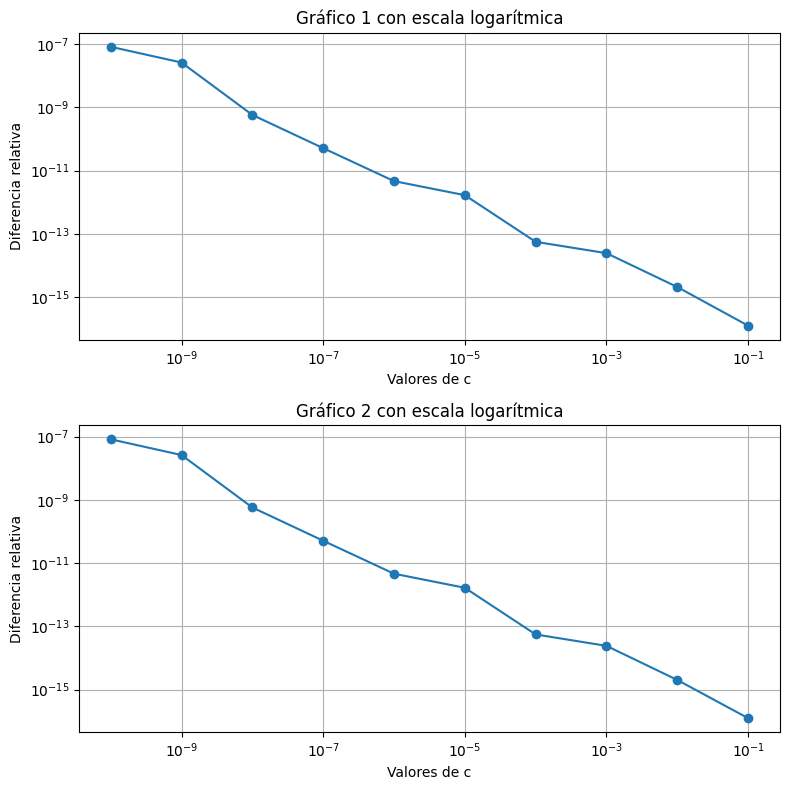

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def cuadratic1(a = 1, b = 1):
  n = np.linspace(1, 10, 10)
  c = np.power(10, -n)
  D = b**2 - 4*a*c
  x_1 = ((-1)*(b) + np.power((D), (1/2)))/(2*a)
  x_2 = ((-1)*(b) - np.power((D), (1/2)))/(2*a)
  y_1 = ((-2)*(c))/((b) + np.power((D), (1/2)))
  y_2 = ((-2)*(c))/((b) - np.power((D), (1/2)))
  dif1 = np.abs((x_1 - y_1)/x_1)
  dif2 = np.abs((x_2 - y_2)/x_2)

  #Apartado para graficar/Graph section
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(c, dif1, marker = "o")
  plt.xscale("log")
  plt.yscale("log")
  plt.xlabel("Valores de c")
  plt.ylabel("Diferencia relativa")
  plt.title("Gráfico 1 con escala logarítmica")
  plt.grid(True)

  plt.subplot(2, 1, 2)
  plt.plot(c, dif2, marker = "o")
  plt.xscale("log")
  plt.yscale("log")
  plt.xlabel("Valores de c")
  plt.ylabel("Diferencia relativa")
  plt.title("Gráfico 2 con escala logarítmica")
  plt.grid(True)

  plt.tight_layout()
  np.set_printoptions(precision=20)


cuadratic1()

Sabemos que al restar dos números con valores muy cercanos, puede ocurrir la cancelación catastrófica. En este caso, esto podría suceder al calcular las raíces $x_1$ e $y_2$, ya que involucran la sustracción de valores cercanos, especialmente cuando $c$ es muy pequeño. Lo que se puede observar en las figuras es que a medida que el valor de $c$ disminuye, el error entre las raíces calculadas por los dos métodos diferentes aumenta. Si ambos métodos fueran igual de precisos, las diferencias relativas no deberían aumentar. A pesar de eso, se observa que aumentan, lo que podría indicar que uno de los métodos es menos preciso.

Si examinamos cada una de las expresiones, notamos que $y_1$ y $x_2$ no presentan sustracciones potencialmente problemáticas, a diferencia de $x_1$ y $y_2$, donde sí las hay. Teniendo lo anterior en cuenta, es muy aconsejable escoger la expresión $\frac{-2c}{b + \sqrt(b^2 - 4ac)}$ para calcular $y_1$ y $\frac{-b - \sqrt(b^2 - 4ac)}{2a}$ para $x_2$ respectivamente.

**Arreglando una expresión matemática:**
Se crea la función para graficar la expresión matemática y la expresión reescrita.

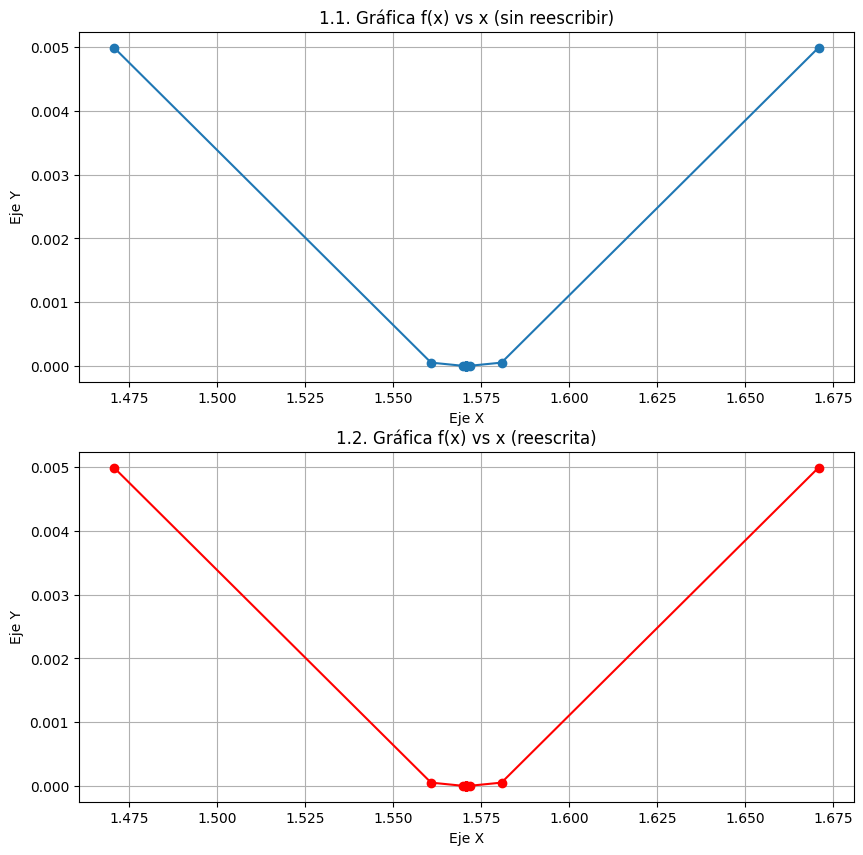

In [ ]:
def f_x() -> None:
  c = np.pi/2
  n = np.linspace(1, 10, 10)
  x = c + np.concatenate((-np.power(10, -n), np.array([0.0]), np.power(10, -n)[::-1]), axis = 0 )
  function = 1 - np.sin(x)
  correct_function = 2 * np.sin(np.pi/4 - x/2) * np.cos(np.pi/4 + x/2)

  #Apartado para graficar/Graph section
  plt.figure(figsize=(10, 10))

  plt.subplot(2, 1, 1)
  plt.plot(x, function, marker = "o")
  plt.xlabel("Eje X")
  plt.ylabel("Eje Y")
  plt.title("1.1. Gráfica f(x) vs x (sin reescribir)")
  plt.grid(True)

  plt.subplot(2, 1, 2)
  plt.plot(x, correct_function, marker = "o", color="red")
  plt.xlabel("Eje X")
  plt.ylabel("Eje Y")
  plt.title("1.2. Gráfica f(x) vs x (reescrita)")
  plt.grid(True)

f_x()

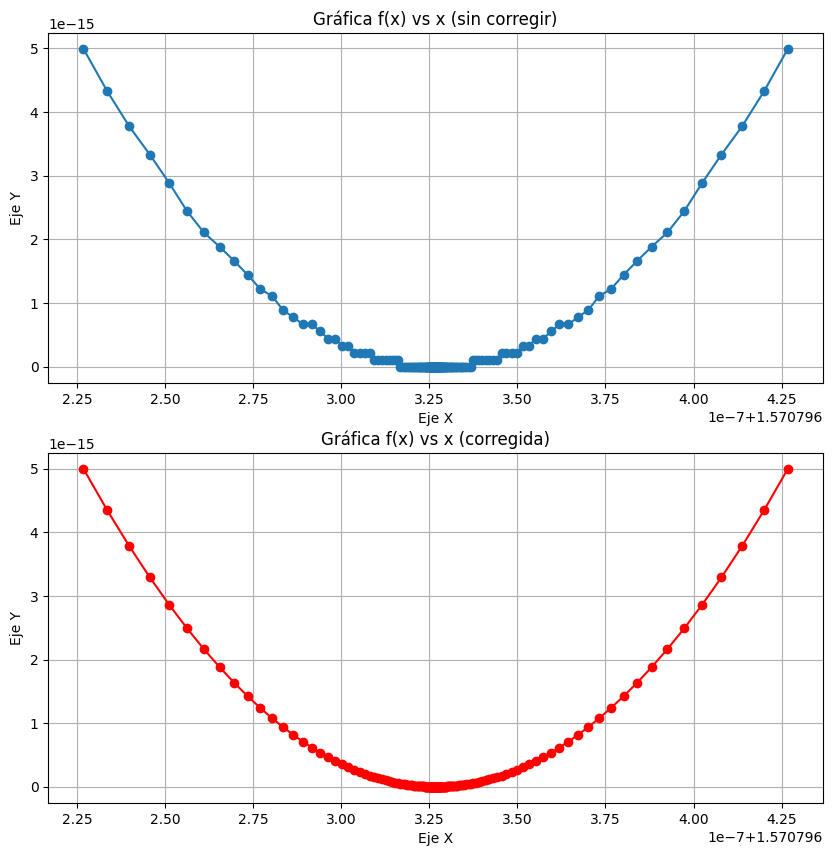

In [ ]:
#Función corregida para incluir mayor cantidad de valores y más cercanos a pi/2
def f_x() -> None:

  c = np.pi/2
  n = np.linspace(7, 10, 100)
  x = c + np.concatenate((-np.power(10, -n), np.array([0.0]), np.power(10, -n)[::-1]), axis = 0 )
  function = 1 - np.sin(x)
  correct_function = 2 * np.sin(np.pi/4 - x/2) * np.cos(np.pi/4 + x/2)

  #Apartado para graficar/Graph section
  plt.figure(figsize=(10, 10))

  plt.subplot(2, 1, 1)
  plt.plot(x, function, marker = "o")
  plt.xlabel("Eje X")
  plt.ylabel("Eje Y")
  plt.title("2.1. Gráfica f(x) vs x (sin corregir)")
  plt.grid(True)

  plt.subplot(2, 1, 2)
  plt.plot(x, correct_function, marker = "o", color="red")
  plt.xlabel("Eje X")
  plt.ylabel("Eje Y")
  plt.title("2.2. Gráfica f(x) vs x (corregida)")
  plt.grid(True)


f_x()

Se puede observar en las gráficas cómo influyen los errores computacionales. Debido a que se realiza una sustracción entre valores muy cercanos entre si (cuando x está muy cerca de $\pi/2$), ocurre la cancelación catastrófica mencionada anteriormente y la solución se aproxima a valores incorrectos o con un error bastante grande. Una vez que se reescribe la función $f(x) = 1 - sin(x)$ como $f(x) = 2sin(\pi/4 - x/2)cos(\pi/4 + x/2)$ ya no se presenta la sustracción. De esta forma el error disminuye.

He ajustado los valores de x de forma que esten más cercanos a $\pi/2$ en las gráficas 2.1 y 2.2, así es posible observar mejor lo que ocurre.